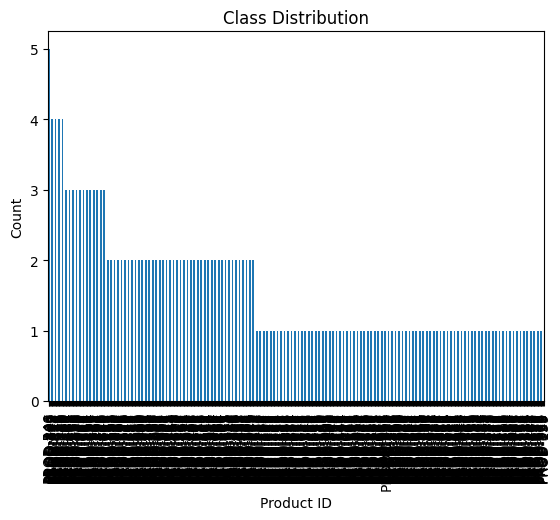

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 6.3764 - val_accuracy: 0.0000e+00 - val_loss: 6.4621
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 3.0980e-04 - loss: 6.4117 - val_accuracy: 0.0000e+00 - val_loss: 6.4642
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 6.9584e-04 - loss: 6.3278 - val_accuracy: 0.0000e+00 - val_loss: 6.4665
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0012 - loss: 6.5560 - val_accuracy: 0.0000e+00 - val_loss: 6.4690
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0035 - loss: 6.4259 - val_accuracy: 0.0000e+00 - val_loss: 6.4718
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0071 - loss: 6.5093 - val_accuracy: 0.0000e+00 - val_loss: 6.4753
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0017 - loss: 6.3777 - val_accuracy: 0.0000e+00 - val_loss: 6.4797
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0015 - loss: 6

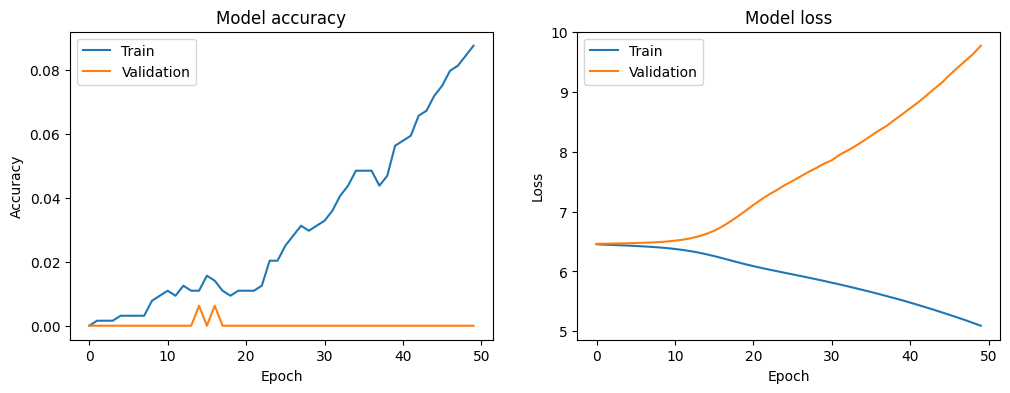

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\AksharaVenkatesh\\OneDrive - ConceptVines\\KPMG\\wholesale_banking_synthetic_data.csv"
data = pd.read_csv(file_path)

# Select relevant features
features = data.drop(['Customer ID', 'Product ID'], axis=1)

# One-hot encode categorical variables
categorical_cols = features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name
encoded_categorical_data = encoder.fit_transform(features[categorical_cols])

# Normalize numerical variables
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(features[numerical_cols])

# Combine encoded categorical data and scaled numerical data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, index=features.index)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, index=features.index)
preprocessed_data = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Define target variable and ensure consistent encoding for train and test sets
target = data['Product ID']
target_encoded, unique_targets = pd.factorize(target)
target_encoded = to_categorical(target_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, target_encoded, test_size=0.2, random_state=42)

# Check class distribution
target_counts = data['Product ID'].value_counts()
target_counts.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Compute class weights if there's class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(target_encoded.argmax(axis=1)), y=target_encoded.argmax(axis=1))
class_weight_dict = dict(enumerate(class_weights))

# Define the neural network architecture
model = Sequential([
    Input(shape=(preprocessed_data.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(target_encoded.shape[1], activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.2f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
